**LSTM 신경망 훈련하기**

In [20]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets
from keras.datasets import imdb
from sklearn.model_selection import train_test_split

In [21]:
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words= 500)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size= 0.2, random_state= 42
)

In [22]:
from keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen= 100)
val_seq = pad_sequences(val_input, maxlen= 100)

In [23]:
##LSTM 셀을 이용한 순환층

model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length= 100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation= 'sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_3 (LSTM)               (None, 8)                 800       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Model Training

rmsprop = keras.optimizers.RMSprop(learning_rate= 1e-4)

model.compile(
    optimizer= 'rmsprop',
    loss= 'binary_crossentropy',
    metrics= ['accuracy']
)

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only= True)

#early_stopping_cb = keras.callbacks.EarlyStopping(patience= 3, restore_best_weights= True)

history= model.fit(
    train_seq, train_target,
    epochs= 100,
    batch_size= 64,
    validation_data= (val_seq, val_target),
    callbacks= [checkpoint_cb]
)

Epoch 1/100
313/313 [==============================] - 4s 11ms/step - loss: 0.4062 - accuracy: 0.8125 - val_loss: 0.4485 - val_accuracy: 0.7868
Epoch 2/100
313/313 [==============================] - 3s 8ms/step - loss: 0.4010 - accuracy: 0.8140 - val_loss: 0.4663 - val_accuracy: 0.7766
Epoch 3/100
313/313 [==============================] - 3s 8ms/step - loss: 0.3976 - accuracy: 0.8153 - val_loss: 0.4275 - val_accuracy: 0.8028
Epoch 4/100
313/313 [==============================] - 3s 8ms/step - loss: 0.3939 - accuracy: 0.8190 - val_loss: 0.4634 - val_accuracy: 0.7738
Epoch 5/100
313/313 [==============================] - 3s 8ms/step - loss: 0.3921 - accuracy: 0.8197 - val_loss: 0.4624 - val_accuracy: 0.7962
Epoch 6/100
313/313 [==============================] - 3s 8ms/step - loss: 0.3903 - accuracy: 0.8212 - val_loss: 0.4368 - val_accuracy: 0.8028
Epoch 7/100
313/313 [==============================] - 3s 8ms/step - loss: 0.3874 - accuracy: 0.8238 - val_loss: 0.4322 - val_accuracy: 0.801

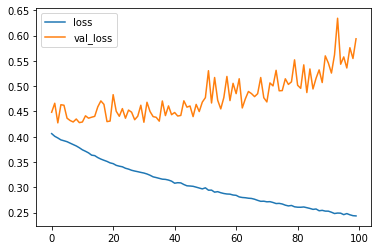

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

**순환층에 Dropout 적용**

In [29]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length= 100))
model2.add(keras.layers.LSTM(8, dropout= 0.3))
model2.add(keras.layers.Dense(1, activation= 'sigmoid'))

In [35]:
# Model Training

rmsprop = keras.optimizers.RMSprop(learning_rate= 1e-4)

model2.compile(
    optimizer= 'rmsprop',
    loss= 'binary_crossentropy',
    metrics= ['accuracy']
)

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', save_best_only= True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience= 5, restore_best_weights= True)

history= model2.fit(
    train_seq, train_target,
    epochs= 50,
    batch_size= 64,
    validation_data= (val_seq, val_target),
    callbacks= [checkpoint_cb]
)

Epoch 1/50
313/313 [==============================] - 4s 10ms/step - loss: 0.4052 - accuracy: 0.8125 - val_loss: 0.4268 - val_accuracy: 0.8068
Epoch 2/50
313/313 [==============================] - 3s 8ms/step - loss: 0.4043 - accuracy: 0.8128 - val_loss: 0.4629 - val_accuracy: 0.7882
Epoch 3/50
313/313 [==============================] - 3s 8ms/step - loss: 0.4042 - accuracy: 0.8144 - val_loss: 0.4439 - val_accuracy: 0.7900
Epoch 4/50
313/313 [==============================] - 3s 8ms/step - loss: 0.4016 - accuracy: 0.8174 - val_loss: 0.4257 - val_accuracy: 0.8056
Epoch 5/50
313/313 [==============================] - 3s 8ms/step - loss: 0.4012 - accuracy: 0.8149 - val_loss: 0.4427 - val_accuracy: 0.8002
Epoch 6/50
313/313 [==============================] - 3s 8ms/step - loss: 0.3983 - accuracy: 0.8205 - val_loss: 0.4247 - val_accuracy: 0.8056
Epoch 7/50
313/313 [==============================] - 3s 8ms/step - loss: 0.3959 - accuracy: 0.8164 - val_loss: 0.4332 - val_accuracy: 0.8012
Epoch

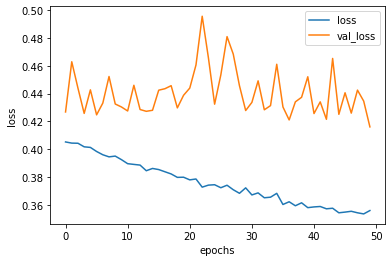

In [37]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])
plt.show()

**2개의 층 연결하기**

In [38]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length= 100))
model3.add(keras.layers.LSTM(8, dropout= 0.3, return_sequences= True))
model3.add(keras.layers.LSTM(8, dropout= 0.3))
model3.add(keras.layers.Dense(1, activation= 'sigmoid'))

model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_5 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_6 (LSTM)               (None, 8)                 544       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Model Training

# Model Training

rmsprop = keras.optimizers.RMSprop(learning_rate= 1e-4)

model3.compile(
    optimizer= 'rmsprop',
    loss= 'binary_crossentropy',
    metrics= ['accuracy']
)

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', save_best_only= True)

#early_stopping_cb = keras.callbacks.EarlyStopping(patience= 5, restore_best_weights= True)

history= model3.fit(
    train_seq, train_target,
    epochs= 50,
    batch_size= 64,
    validation_data= (val_seq, val_target),
    callbacks= [checkpoint_cb]
)

Epoch 1/50
313/313 [==============================] - 6s 14ms/step - loss: 0.4146 - accuracy: 0.8112 - val_loss: 0.4203 - val_accuracy: 0.8086
Epoch 2/50
313/313 [==============================] - 4s 12ms/step - loss: 0.4112 - accuracy: 0.8123 - val_loss: 0.5346 - val_accuracy: 0.7590
Epoch 3/50
313/313 [==============================] - 4s 12ms/step - loss: 0.4070 - accuracy: 0.8141 - val_loss: 0.4539 - val_accuracy: 0.7892
Epoch 4/50
313/313 [==============================] - 4s 12ms/step - loss: 0.4080 - accuracy: 0.8145 - val_loss: 0.4262 - val_accuracy: 0.8074
Epoch 5/50
313/313 [==============================] - 4s 12ms/step - loss: 0.4064 - accuracy: 0.8130 - val_loss: 0.4213 - val_accuracy: 0.8064
Epoch 6/50
313/313 [==============================] - 4s 12ms/step - loss: 0.4044 - accuracy: 0.8146 - val_loss: 0.4171 - val_accuracy: 0.8090
Epoch 7/50
313/313 [==============================] - 4s 12ms/step - loss: 0.4017 - accuracy: 0.8159 - val_loss: 0.4273 - val_accuracy: 0.8004

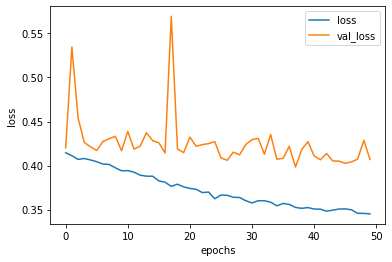

In [42]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])
plt.show()